# Class 11 - August 12th Notes

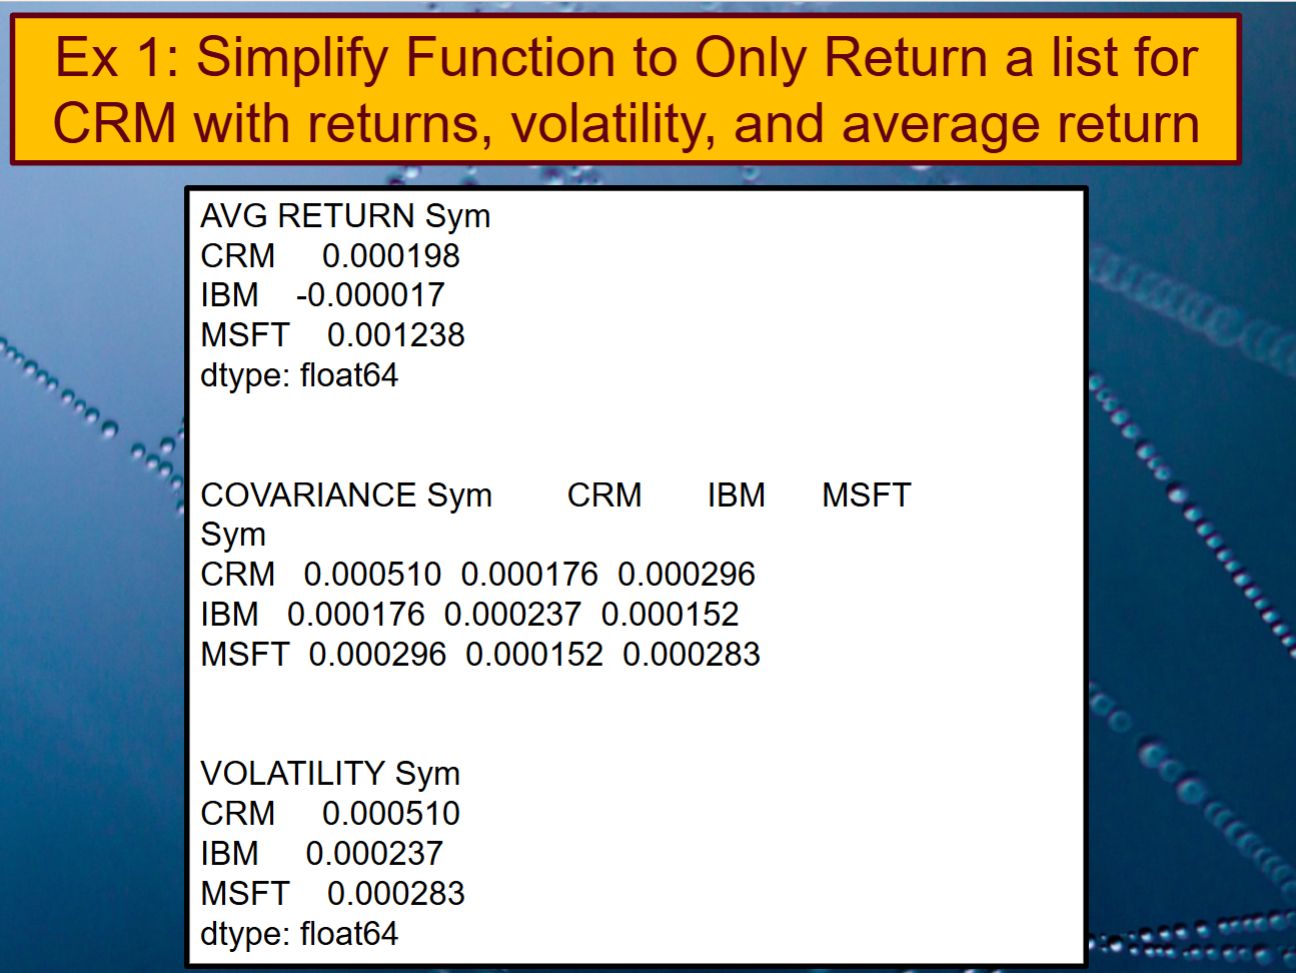

In [ ]:
import pandas as pd

def returns():
    ibm = pd.read_csv("IBM.csv")
    
    # Keep only Date and Adj Close
    ibm = ibm[["Date", "Adj Close"]]
    
    # Calculate daily returns
    ibm["Return"] = ibm["Adj Close"].pct_change()

    # Set Date as index
    ibm = ibm.set_index("Date")

    retmean = ibm["Return"].mean()
    vol = ibm["Return"].var()

    return [ibm, retmean, vol]
    
[rlist, mean, vol]=returns() 
# r=returns()
# print(r[1])
print(rlist)
print("Mean: {}".format(round(mean,6)))
print("Volatilty: {}".format(round(vol,6)))

            Adj Close    Return
Date                           
8/1/2017   139.422287       NaN
8/2/2017   138.606674 -0.005850
8/3/2017   139.076843  0.003392
8/4/2017   139.287964  0.001518
8/7/2017   137.666321 -0.011642
...               ...       ...
7/26/2018  146.710007  0.000614
7/27/2018  145.149994 -0.010633
7/30/2018  145.490005  0.002342
7/31/2018  144.929993 -0.003849
8/1/2018   143.630005 -0.008970

[253 rows x 2 columns]
Mean: 0.000201
Volatilty: 0.000168


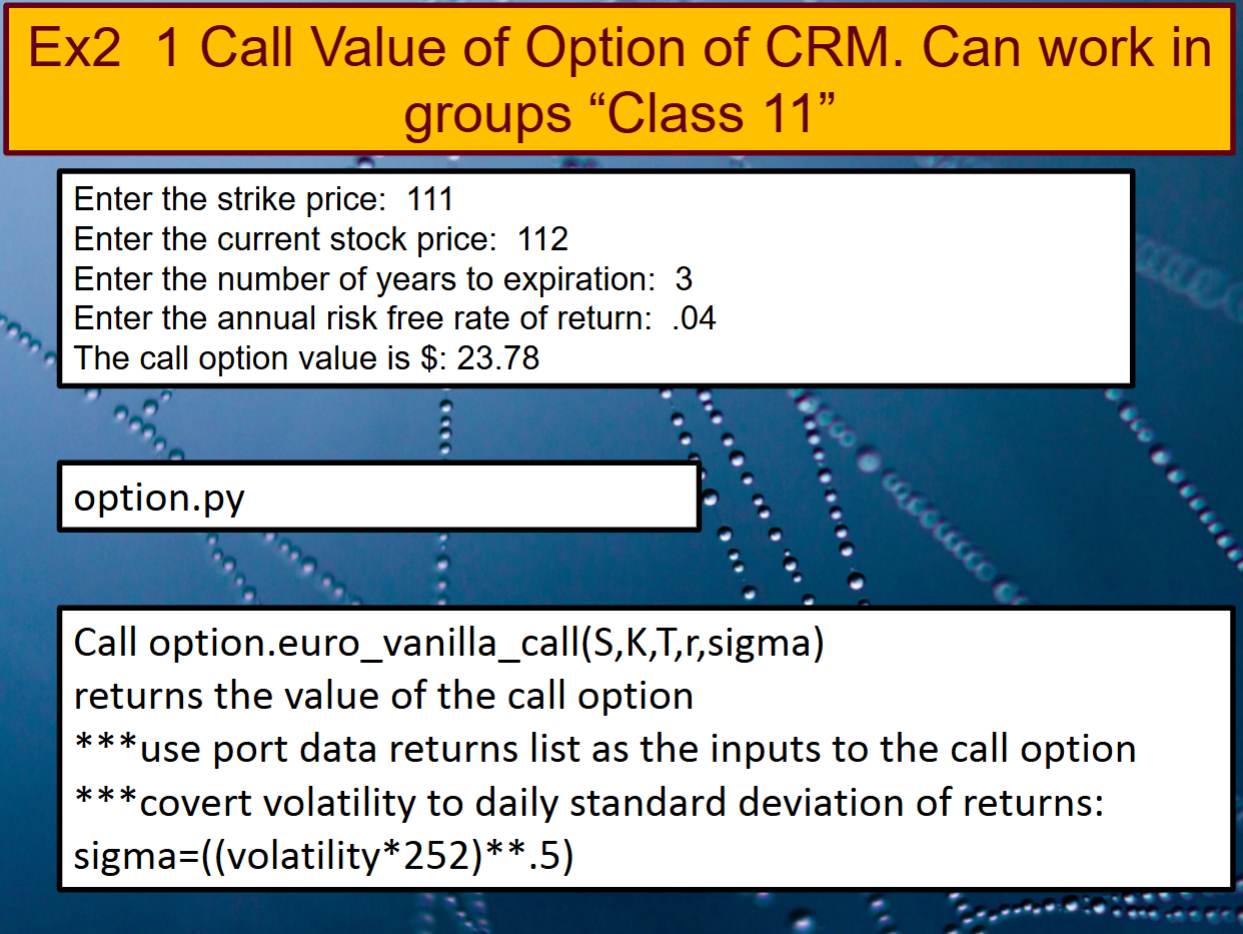

In [58]:
import option as ot

def main():
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset

    K = 5
    S = 5
    T = 5
    R = 0.5
    # K = float(input("Enter strike price: "))
    # S = float(input("Enter current stock price: "))
    # T = float(input("Number of years till expiration: "))
    # R = float(input("Enter risk free rate of return: "))

    sigma = ((vol*252)**0.5)
    result = ot.euro_vanilla_call(S, K, T, R, sigma)
    print(result)

main()

4.589575009895055


## Practise

In [ ]:
import QuantLib as qt

ex=float(input('Enter exchage rate from EUR to USD: '))
us=float(input("Enter number of US Dollars to Exchange: "))
eu=float(input("Enter number of Euros to Exchange: "))

###Initializing the currencies
usd = qt.USDCurrency()
eur = qt.EURCurrency()
###create object of the exchange which call method exchange
usdToeur = qt.ExchangeRate(eur, usd, ex)

###object for the output (formats our currecny)
m_usd = us * usd
m_eur = eu * eur
print( 'Converting from USD: ', m_usd, ' = ', usdToeur.exchange(m_usd))
print( 'Converting from EUR: ', m_eur, ' = ', usdToeur.exchange(m_eur))

#printing the fucntion inputs. 
print(usdToeur.source())
print(usdToeur.target())
print(usdToeur.rate())

Converting from USD:  10 USD  =  8.7 EUR
Converting from EUR:  12 EUR  =  13.8 USD
European Euro
U.S. dollar
1.15


In [15]:
def returns():

    import pandas as pd
    

    ibm = pd.read_csv("IBM.csv")
    msft = pd.read_csv("MSFT.csv")
    crm = pd.read_csv("CRM.csv")
    
    ibm["Stock Symbol"] = "IBM"
    crm["Stock Symbol"] = "CRM"
    msft["Stock Symbol"] = "MSFT"
    ##we want to merge together
    
    tot=pd.concat([ibm,msft,crm])
    tot=tot[['Date','Stock Symbol','Adj Close']]
    #pivot to create columns of stock prices with row dates.
    tot=tot.pivot(index='Date',columns='Stock Symbol',values='Adj Close')
    ##plot
    # print(tot.head(10))
    
    ###calculate returns table
    ret=tot.pct_change()
    ###plot
    
    ###inputs for financial models.
    retmean = ret.mean()
    cov = ret.cov()
    vol=ret.var()
   
    return [ret,cov,vol,retmean]
    
rlist=returns()
print(rlist)

[Stock Symbol  CRM       IBM  MSFT
Date                             
1/10/2018     NaN       NaN   NaN
1/11/2018     NaN  0.000122   NaN
1/12/2018     NaN -0.006456   NaN
1/16/2018     NaN  0.004352   NaN
1/17/2018     NaN  0.029295   NaN
...           ...       ...   ...
9/29/2017     0.0 -0.003982   0.0
9/5/2017      0.0 -0.014061   0.0
9/6/2017      0.0  0.005453   0.0
9/7/2017      0.0 -0.006397   0.0
9/8/2017      0.0 -0.003149   0.0

[504 rows x 3 columns], Stock Symbol           CRM           IBM          MSFT
Stock Symbol                                          
CRM           3.185314e-04  1.353304e-08  1.845196e-04
IBM           1.353304e-08  2.479183e-04  8.480409e-08
MSFT          1.845196e-04  8.480409e-08  1.767153e-04, Stock Symbol
CRM     0.000319
IBM     0.000248
MSFT    0.000177
dtype: float64, Stock Symbol
CRM     0.000123
IBM    -0.000178
MSFT    0.000774
dtype: float64]


C:\Users\rohil\AppData\Local\Temp\ipykernel_34820\66415548.py:23: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret=tot.pct_change()
